# Dimensionality Reduction

When working with a dataset, one of the first and most important steps into getting an insight of the data is visualizing it. However, human brain is compatible with visualizing data in at most 3 dimensions. Most of the datasets, especially in the food science domain, today have many dimensions, e.g. RNA/DNA sequencing datasets have thousands of dimensions. In this context, it is very difficult to understand any structure of the data because it is impossible to visualize a thousands-dimensional hyperplane. However, this does not mean that there is no escape from the "Curse of Dimensionality", as this problem is referred to in the machine learning domain. At this point, dimensionality reduction techniques come in hand. They have the ability to transform a highly dimensional dataset with thousands of features to a new one with 2, 3 or as many features as are needed. The most fascinating part is that they can do  this by retaining the most important information that the highly-dimensional dataset conveys. Below we will explore some of the most used dimensionality reduction techniques in the [Wine Quality dataset taken from UC Irvine Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/wine+quality).

## Set Up

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap

c:\Users\Doriela\anaconda3\envs\data-vis-jupyter-book\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
%config InlineBackend.figure_format='svg'

In [3]:
FONT_FAMILY = 'DejaVu Sans'
FONT_SCALE = 1.3

## Load and preprocess the dataset

The `red_wine` dataset contains 1599 records and 12 columns. The `white_whine` dataset on the other hand contains 4898 rows and 12 columns.

In [4]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

#adding the label to distinguish them in the visualization phase
red_wine['label'] = 'red'
white_wine['label'] = 'white'

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
red_wine.shape

(1599, 13)

In [7]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
white_wine.shape

(4898, 13)

After loading, we will combine them in a single dataset.

In [9]:
wine_dataset = pd.concat([red_wine, white_wine], axis = 0)

In [10]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
wine_dataset.shape

(6497, 13)

As you can see, the resulting dataset contains 6497 rows and 13 columns, the total of white and red wine rows. Now we are ready to apply dimensionality reduction techniques to visualize the dataset. As we can see, there are 13 features (one of which is the label which we will keep for visualizing) and we cannot directly visualize the dataset. Instead, we are going to downgrade from 12 to 2 features (we are keeping the label for visualization later on) and proceed with the visualization.

**NOTE:** Since some of the methods rely on calculating distances between points in the dataset, we first scale all the attributes using StandardScaler from scikit learn, so that all dimensions will have the same importance when calculating the low dimensional values.

In [12]:
sc = StandardScaler()
wine_dataset_scaled = sc.fit_transform(wine_dataset.iloc[:, :-1])

#showing output of some columns after scaling
pd.DataFrame(wine_dataset_scaled, columns=wine_dataset.columns[:-1]).head().iloc[:, :4]

,fixed acidity,volatile acidity,citric acid,residual sugar
0,0.142473,2.188833,-2.192833,-0.744778
1,0.451036,3.282235,-2.192833,-0.597640
2,0.451036,2.553300,-1.917553,-0.660699
3,3.073817,-0.362438,1.661085,-0.744778
4,0.142473,2.188833,-2.192833,-0.744778


For more formal mathematical information and insights please refer to [this Wikipedia](https://en.wikipedia.org/wiki/Dimensionality_reduction) article about PCA, tSNE, UMAP and other dimensionality reduction techniques.

## Principal Component Analysis (PCA)

(For more information please refer to: [PCA](https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad)).

Principal Component Analysis (PCA) is a technique that allows projecting of data from a highly dimensional space to a low dimensional one. PCA is very helpful for visualizations because it helps us reduce a dataset from many to 2 or 3 dimensions by retaining most of the information present and then visualize it. Usually, after applying PCA the most uncorrelated features are retained. This means that the algorithm picks the features that give the most information about the data. Below we will see how we can apply PCA in our wine dataset.

As explained above, we input scaled data to the PCA algorithm.

In [13]:
pca = PCA(n_components=2)
pca_components = pd.DataFrame(
    pca.fit_transform(wine_dataset_scaled), 
    columns=['dim_1', 'dim_2'])

In [14]:
pca_components.head()

,dim_1,dim_2
0,-3.348438,0.568926
1,-3.228595,1.197335
2,-3.237468,0.952580
3,-1.672561,1.600583
4,-3.348438,0.568926


In [15]:
labels = wine_dataset.iloc[:, -1].reset_index()
low_dimensional_data_pca = pd.concat([pca_components, labels], axis=1)

In [16]:
low_dimensional_data_pca.drop(columns=['index']).head()

,dim_1,dim_2,label
0,-3.348438,0.568926,red
1,-3.228595,1.197335,red
2,-3.237468,0.952580,red
3,-1.672561,1.600583,red
4,-3.348438,0.568926,red


Now, we are ready to see how the dataset looks in 2 dimensions. So as an overview, we had a dataset with 12 features, excluding the labels. Using PCA we expressed the same dataset in 2 features. Below, the dataset shows how the records mapped in the 2D coordinate system look like. The number of dimensions is a parameter that we choose for the model, however it is easier for people to perceive things in 2 or 3 dimensions. So it is very common for visualization purposes to use 2 or maximum 3 dimensions that preserve most of the information.

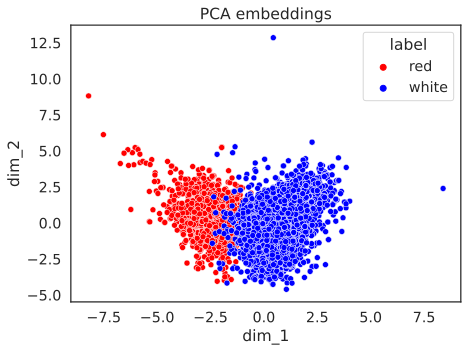

In [17]:
sns.set(rc={'figure.figsize':(7, 5), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    sns.scatterplot(data = low_dimensional_data_pca,
                    x = 'dim_1', y = 'dim_2',
                    hue = 'label',
                    palette=['red', 'blue']).set(title='PCA embeddings')

As we can see from the plot, the two types of wine are separated and there is little overlap.

## t-Distributed Stochastic Neighbor Embedding (tSNE)

(For more information please refer to this source: [tSNE](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1)).

t-SNE, just like PCA is another dimensionality reduction technique. However, it differes from PCA. PCA tries to put further apart points that are different, while tSNE on the other hand focuses more on putting similiar points closer to onw another. In addition, tSNE does not preserve inter-cluster distances.
Now, let us apply t-SNE and see how it will represent data in the low dimensional space. Again, distances between points have to be calculated, so we input the scaled version of the dataset to the tSNE object. Besides of the `n_components` hyperparameter, that specifies the dimensions in the low space, there is another paramaeter that can be tuned, the `perplexity`. In a high level view, this determines the number of neighbors that should be considered when calculating the distance for each point in the dataset. By default, `euclidian distance` is used. The more data points there are, the highest the perplexity should be. The default is 30.

In [18]:
tsne = TSNE(n_components=2, perplexity=30)
tsne_components = pd.DataFrame(
    data=tsne.fit_transform(wine_dataset_scaled), 
    columns=['dim_1', 'dim_2'])

After tSNE calculates the components, we need to concatenate the returned DataFrame with the labels to be able to visualize it. We can do so via the following code:

In [19]:
low_dimensional_data_tsne = pd.concat([tsne_components, labels], axis=1)
low_dimensional_data_tsne.head()

,dim_1,dim_2,index,label
0,-28.203903,48.765175,0,red
1,-23.233883,51.039669,1,red
2,-22.908800,50.751369,2,red
3,16.828754,75.301208,3,red
4,-28.203636,48.765011,4,red


Now, time to visualize the findings:

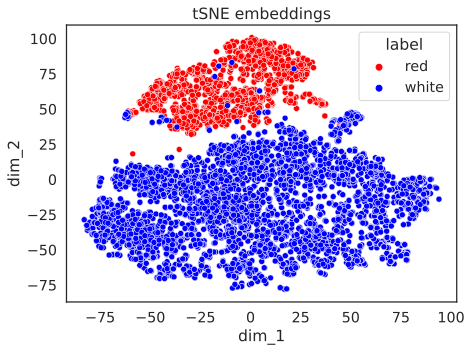

In [20]:
sns.set(rc={'figure.figsize':(7, 5), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    sns.scatterplot(data = low_dimensional_data_tsne,
                    x = 'dim_1', y = 'dim_2',
                    hue = 'label',
                    palette=['red', 'blue']).set(title='tSNE embeddings')

In this case, tSNE has separated the two groups of wine although there are some points that are on the wrong side. In additiion, we see that the low dimensional data is more spread now.

## Uniform Approximation and Projection (UMAP)

(For more information please refer to this source: [UMAP](https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568)).

UMAP is the third dimensionality reduction method that we are going to explore. Usually it performs better then tSNE for large datasets and it is known for preserving the global structure of the clusters as well as the inter-cluster distances.

The hyperparameters that can be set by us here are `n_components`, `n_neighbors` and `min_dist` (although we do not tune this here). The `n_components`, as in PCA and tSNE shows the number of dimensions in the low dimensional space. The `n_neighbors` is the number of neighbors that should be considered when calculating the distances. In order, to have deterministic results we pass the `random_state=0`, as well. Since the algorithm deals with distances, again the data that we pass to it is scaled using a StandardScaler object.

In [21]:
umap = umap.UMAP(n_components = 2, n_neighbors = 5, random_state = 0)
umap_components = pd.DataFrame(
                    data=umap.fit_transform(wine_dataset_scaled), 
                    columns=['dim_1', 'dim_2'])

Again, we concatenate the low dimensional data with the labels that we will need for the visualization.

In [22]:
low_dimensional_data_umap = pd.concat([umap_components, labels], axis=1)
low_dimensional_data_umap.head()

,dim_1,dim_2,index,label
0,12.357877,5.146673,0,red
1,13.302794,4.763113,1,red
2,13.283134,4.875544,2,red
3,13.878761,-1.260338,3,red
4,12.361040,5.153193,4,red


Here you can see how the low dimensional embeddings with UMAP look like in a 2D plot.

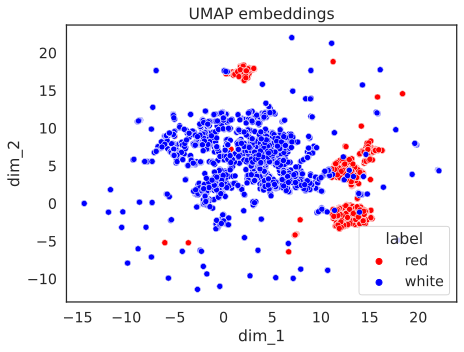

In [23]:
sns.set(rc={'figure.figsize':(7, 5), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    sns.scatterplot(data = low_dimensional_data_umap,
                    x = 'dim_1', y = 'dim_2',
                    hue = 'label',
                    palette=['red', 'blue']).set(title='UMAP embeddings')

This concludes our discussion about the dimensionality reduction techniques. Next on, we will see some actual implementations of what we have discussed so far.